True arm means:        [0.2 0.5 0.1 0.8 0.6]
Estimated arm values:  [0.207 0.515 0.074 0.797 0.601]
Pulled counts:         [ 24  18  22 876  60]
Best arm (true):       3


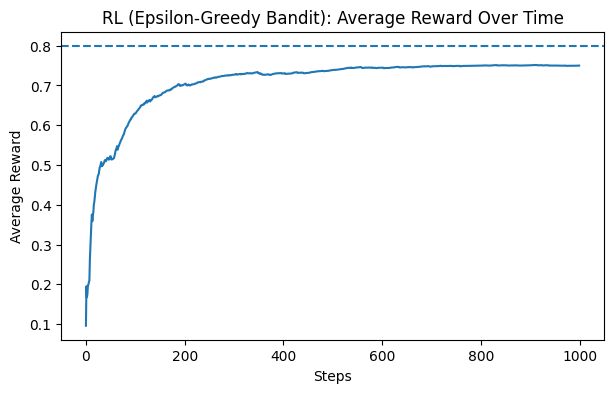

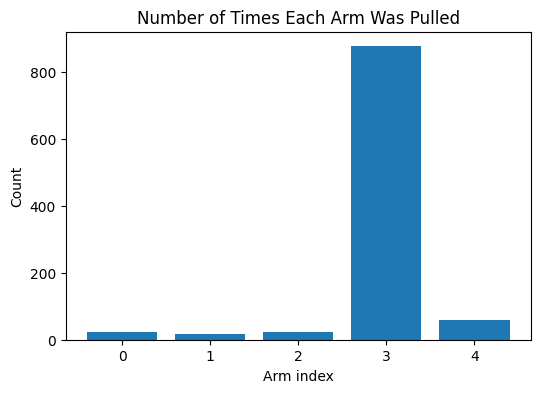

In [1]:
# Mini Reinforcement Learning demo: Epsilon-Greedy Multi-Armed Bandit
# Goal: Agent learns which "arm" (action) gives highest reward by trial & error.

import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(42)

# 1) Environment: 5 slot machines (arms), each with a true mean reward
true_means = np.array([0.2, 0.5, 0.1, 0.8, 0.6])  # stationary rewards in [0,1]
n_arms = len(true_means)

# 2) Agent settings
epsilon = 0.1          # 10% of the time: explore (random), otherwise exploit best-known
steps = 1000           # interaction steps
Q = np.zeros(n_arms)   # estimated value of each arm
N = np.zeros(n_arms)   # how many times each arm was pulled

rewards = []
chosen_arms = []

for t in range(steps):
    # Choose action (arm): epsilon-greedy
    if rng.random() < epsilon:
        a = rng.integers(n_arms)                 # explore
    else:
        a = int(np.argmax(Q))                    # exploit best estimate

    # Environment gives a reward ~ Normal(true_mean, 0.1)
    r = rng.normal(true_means[a], 0.1)
    rewards.append(r)
    chosen_arms.append(a)

    # Incremental update of the value estimate for arm a
    N[a] += 1
    Q[a] += (r - Q[a]) / N[a]

# 3) Results
avg_reward = np.cumsum(rewards) / (np.arange(steps) + 1)
best_arm = int(np.argmax(true_means))
pull_counts = np.bincount(chosen_arms, minlength=n_arms)

print("True arm means:       ", np.round(true_means, 3))
print("Estimated arm values: ", np.round(Q, 3))
print("Pulled counts:        ", pull_counts)
print("Best arm (true):      ", best_arm)

# Plot average reward over time
plt.figure(figsize=(7,4))
plt.plot(avg_reward)
plt.axhline(true_means[best_arm], linestyle="--")
plt.title("RL (Epsilon-Greedy Bandit): Average Reward Over Time")
plt.xlabel("Steps")
plt.ylabel("Average Reward")
plt.show()

# Plot how often each arm was chosen
plt.figure(figsize=(6,4))
plt.bar(np.arange(n_arms), pull_counts)
plt.title("Number of Times Each Arm Was Pulled")
plt.xlabel("Arm index")
plt.ylabel("Count")
plt.show()
